In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

In [42]:
data = pd.read_csv("df.csv")
data_corr = data.drop(columns=["Company", "Sector"])

In [43]:
data_corr.corr()

,CR,DA,FL,OPM,RT,TAT,DE,Y,PT
CR,1.000000,-0.225917,-0.179232,0.284529,-0.151203,-0.123665,-0.141136,-0.018690,-0.040483
DA,-0.225917,1.000000,0.340320,0.015032,0.206620,-0.083691,0.464786,0.164599,-0.120993
FL,-0.179232,0.340320,1.000000,-0.112430,-0.076335,0.156169,0.968612,0.759323,0.032588
OPM,0.284529,0.015032,-0.112430,1.000000,0.051672,-0.298701,-0.050014,0.051308,0.021409
RT,-0.151203,0.206620,-0.076335,0.051672,1.000000,0.206580,-0.065267,-0.046290,0.097708
TAT,-0.123665,-0.083691,0.156169,-0.298701,0.206580,1.000000,0.094869,0.301222,0.017872
DE,-0.141136,0.464786,0.968612,-0.050014,-0.065267,0.094869,1.000000,0.724604,-0.025348
Y,-0.018690,0.164599,0.759323,0.051308,-0.046290,0.301222,0.724604,1.000000,-0.001363
PT,-0.040483,-0.120993,0.032588,0.021409,0.097708,0.017872,-0.025348,-0.001363,1.000000


Y závislou (vysvětlovanou) - svislou osu (y)
FL nezávislou (vysvětlující) - vodorovnou osu (x)

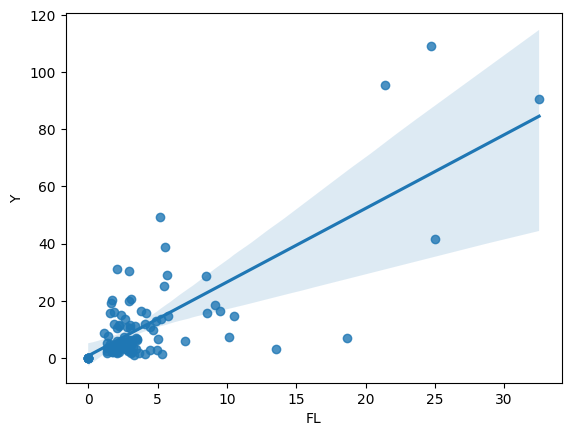

In [44]:
g = sns.regplot(data_corr, x="FL", y="Y")

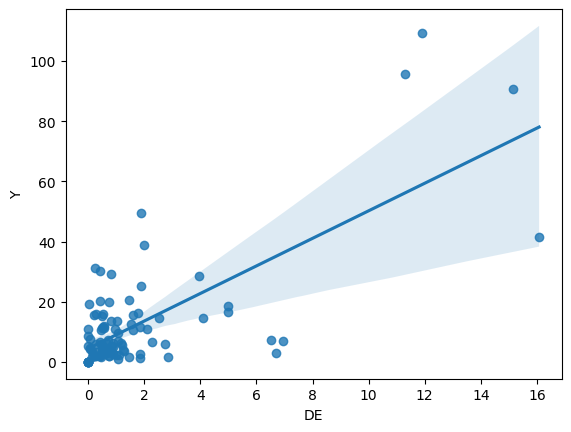

In [45]:
g = sns.regplot(data_corr, x="DE", y="Y")

In [46]:
formula = "Y ~ CR + DA + FL + OPM + RT + TAT + DE + PT"
mod = smf.ols(formula=formula, data=data_corr)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     22.52
Date:                Sun, 31 Dec 2023   Prob (F-statistic):           1.45e-18
Time:                        19:14:45   Log-Likelihood:                -375.94
No. Observations:                 100   AIC:                             769.9
Df Residuals:                      91   BIC:                             793.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.0176      5.347     -2.061      0.042     -21.638      -0.397
CR             1.5014      1.240      1.211      0.229      -0.961       3.964
DA            -5.2206      9.370     -0.557      0.579     -23.834      13.392
FL             3.0104      1.060      2.840      0.006       0.905       5.116
OPM           23.4665      8.076      2.906      0.005       7.425      39.508
RT            -0.0063      0.021     -0.300      0.765      -0.048       0.035
TAT            8.4254      2.351      3.584      0.001       3.756      13.095
DE            -0.7283      2.066     -0.352      0.725      -4.833       3.376
PT            -0.0644      0.096     -0.669      0.505      -0.256       0.127
==============================================================================
Omnibus:                       29.136   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.551
Skew:                           0.881   Prob(JB):                     8.88e-23
Kurtosis:                       7.611   Cond. No.                         592.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
formula = "Y ~ FL + OPM + TAT"
mod = smf.ols(formula=formula, data=data_corr)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     59.51
Date:                Sun, 31 Dec 2023   Prob (F-statistic):           7.99e-22
Time:                        19:14:45   Log-Likelihood:                -377.99
No. Observations:                 100   AIC:                             764.0
Df Residuals:                      96   BIC:                             774.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.4188      2.865     -3.637      0.000     -16.106      -4.732
FL             2.5281      0.208     12.149      0.000       2.115       2.941
OPM           24.8478      7.542      3.295      0.001       9.878      39.818
TAT            8.5518      2.205      3.879      0.000       4.176      12.928
==============================================================================
Omnibus:                       26.748   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.291
Skew:                           0.876   Prob(JB):                     2.71e-17
Kurtosis:                       6.904   Cond. No.                         50.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nový model po odstranění stat. nevýznamných má přibližně stejný koeficient determinace, nedošlo k zlepšení predikce skutečných cen akcií.

In [49]:
data = pd.read_csv("df.csv")
data["Ypredicted"] = res.predict(data_corr)
data.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Ypredicted
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials,0.502359
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,23.356512
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services,6.944718
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive,15.708512
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical,1.701358


In [50]:
data["Ydiff"] = data["Ypredicted"] - data["Y"]
data.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Ypredicted,Ydiff
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials,0.502359,-1.447641
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,23.356512,16.096512
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services,6.944718,-0.835282
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive,15.708512,9.538512
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical,1.701358,1.701358


In [51]:
data.loc[data["Ydiff"].idxmax()]

Company             SYXLy
CR                   0.76
DA                   0.37
FL                  18.64
OPM                0.0631
RT                  12.44
TAT                  0.41
DE                   6.93
Y                    6.97
PT                    3.4
Sector        Industrials
Ypredicted      41.779545
Ydiff           34.809545
Name: 79, dtype: object